In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Load the dataset
try:
    df = pd.read_csv(r'd:\5th Sem\ML\DATASET\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found. Please check the path.")
    # For demonstration, create a sample dataset if file not found
    np.random.seed(42)
    n_samples = 1000
    df = pd.DataFrame({
        'customerID': [f'ID_{i}' for i in range(n_samples)],
        'tenure': np.random.randint(1, 72, n_samples),
        'MonthlyCharges': np.random.normal(65, 30, n_samples),
        'TotalCharges': np.random.normal(2300, 2000, n_samples),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples),
        'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples),
        'gender': np.random.choice(['Male', 'Female'], n_samples),
        'Churn': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7])
    })
    print("Sample dataset created for demonstration.")

# Display basic information about the dataset
print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (7043, 21)
Number of rows: 7043
Number of columns: 21


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display data types and info
print("\nDataset Info:")
df.info()

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [4]:
# Statistical summary
print("Statistical Summary:")
display(df.describe())

# Check target variable distribution
print("\nChurn Distribution:")
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f"\nChurn Rate: {churn_counts['Yes'] / len(df) * 100:.2f}%")

Statistical Summary:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


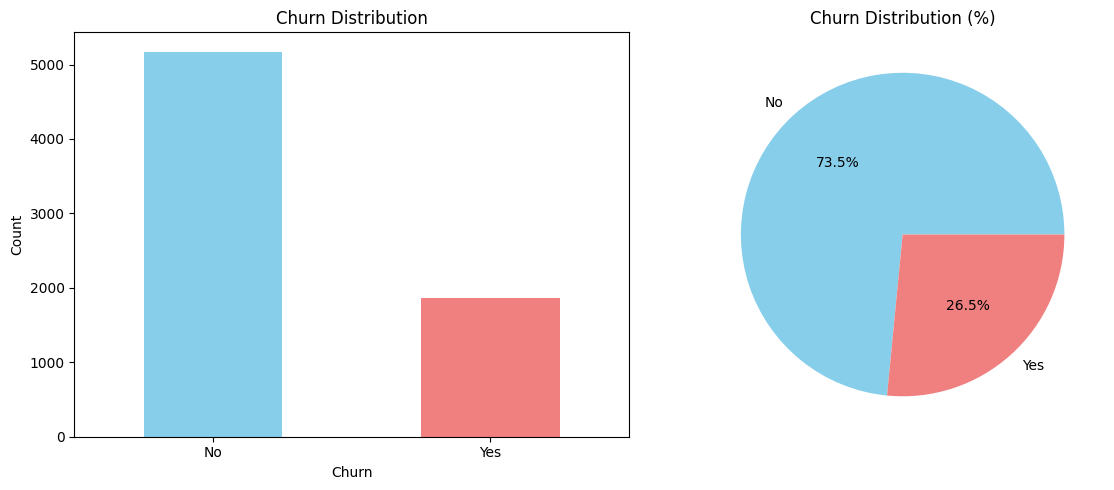

In [5]:
# Visualize churn distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing and Cleaning

In [6]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")

Missing values in each column:
Series([], dtype: int64)
No missing values found!


In [7]:
# Handle missing values by filling with median for numerical columns
# First, let's identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Remove customerID if it exists (not useful for prediction)
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    categorical_cols.remove('customerID')
    print("\nRemoved customerID column")

# Handle potential string values in numerical columns (like TotalCharges)
for col in numerical_cols:
    if col in df.columns:
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Fill missing values with median
        if df[col].isnull().sum() > 0:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Filled {col} missing values with median: {median_value:.2f}")

print("\nData preprocessing completed!")

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Removed customerID column

Data preprocessing completed!


In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df.shape}")

# Final check for missing values
print(f"\nFinal missing values check: {df.isnull().sum().sum()}")

Number of duplicate rows: 22
Removed 22 duplicate rows
New dataset shape: (7021, 20)

Final missing values check: 0


## 4. Encode Categorical Variables

In [9]:
# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Initialize label encoders dictionary
label_encoders = {}

# Update categorical columns list (excluding target variable)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')  # We'll handle target separately

print(f"Categorical columns to encode: {categorical_cols}")

# Encode categorical variables using Label Encoder
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {list(le.classes_)}")

# Encode target variable (Churn)
target_encoder = LabelEncoder()
df_encoded['Churn'] = target_encoder.fit_transform(df_encoded['Churn'])
print(f"\nTarget variable encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Encoded gender: ['Female', 'Male']
Encoded Partner: ['No', 'Yes']
Encoded Dependents: ['No', 'Yes']
Encoded PhoneService: ['No', 'Yes']
Encoded MultipleLines: ['No', 'No phone service', 'Yes']
Encoded InternetService: ['DSL', 'Fiber optic', 'No']
Encoded OnlineSecurity: ['No', 'No internet service', 'Yes']
Encoded OnlineBackup: ['No', 'No internet service', 'Yes']
Encoded DeviceProtection: ['No', 'No internet service', 'Yes']
Encoded TechSupport: ['No', 'No internet service', 'Yes']
Encoded StreamingTV: ['No', 'No internet service', 'Yes']
Encoded StreamingMovies: ['No', 'No internet service', 'Yes']
Encoded Contract: ['Month-to-month', 'One year', 'Two year']
Encoded PaperlessBilling: ['No', 'Yes']
Enco

In [10]:
# Display the encoded dataset
print("Encoded dataset (first 5 rows):")
display(df_encoded.head())

print(f"\nEncoded dataset shape: {df_encoded.shape}")
print(f"Data types after encoding:")
print(df_encoded.dtypes)

Encoded dataset (first 5 rows):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1



Encoded dataset shape: (7021, 20)
Data types after encoding:
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object


## 5. Split Data into Training and Testing Sets

In [11]:
# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain the same proportion of classes in train and test
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining set churn distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTesting set churn distribution:")
print(y_test.value_counts(normalize=True))

Features shape: (7021, 19)
Target shape: (7021,)

Feature columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Training set: 5616 samples
Testing set: 1405 samples

Training set churn distribution:
Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64

Testing set churn distribution:
Churn
0    0.735231
1    0.264769
Name: proportion, dtype: float64


## 6. Train Decision Tree Classifier

In [12]:
# Create and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit depth to prevent overfitting for visualization
    min_samples_split=20,
    min_samples_leaf=10
)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_train_pred = dt_classifier.predict(X_train)
dt_test_pred = dt_classifier.predict(X_test)

print("Decision Tree Classifier trained successfully!")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")

Decision Tree Classifier trained successfully!
Tree depth: 5
Number of leaves: 31


## 7. Visualize Decision Tree Structure

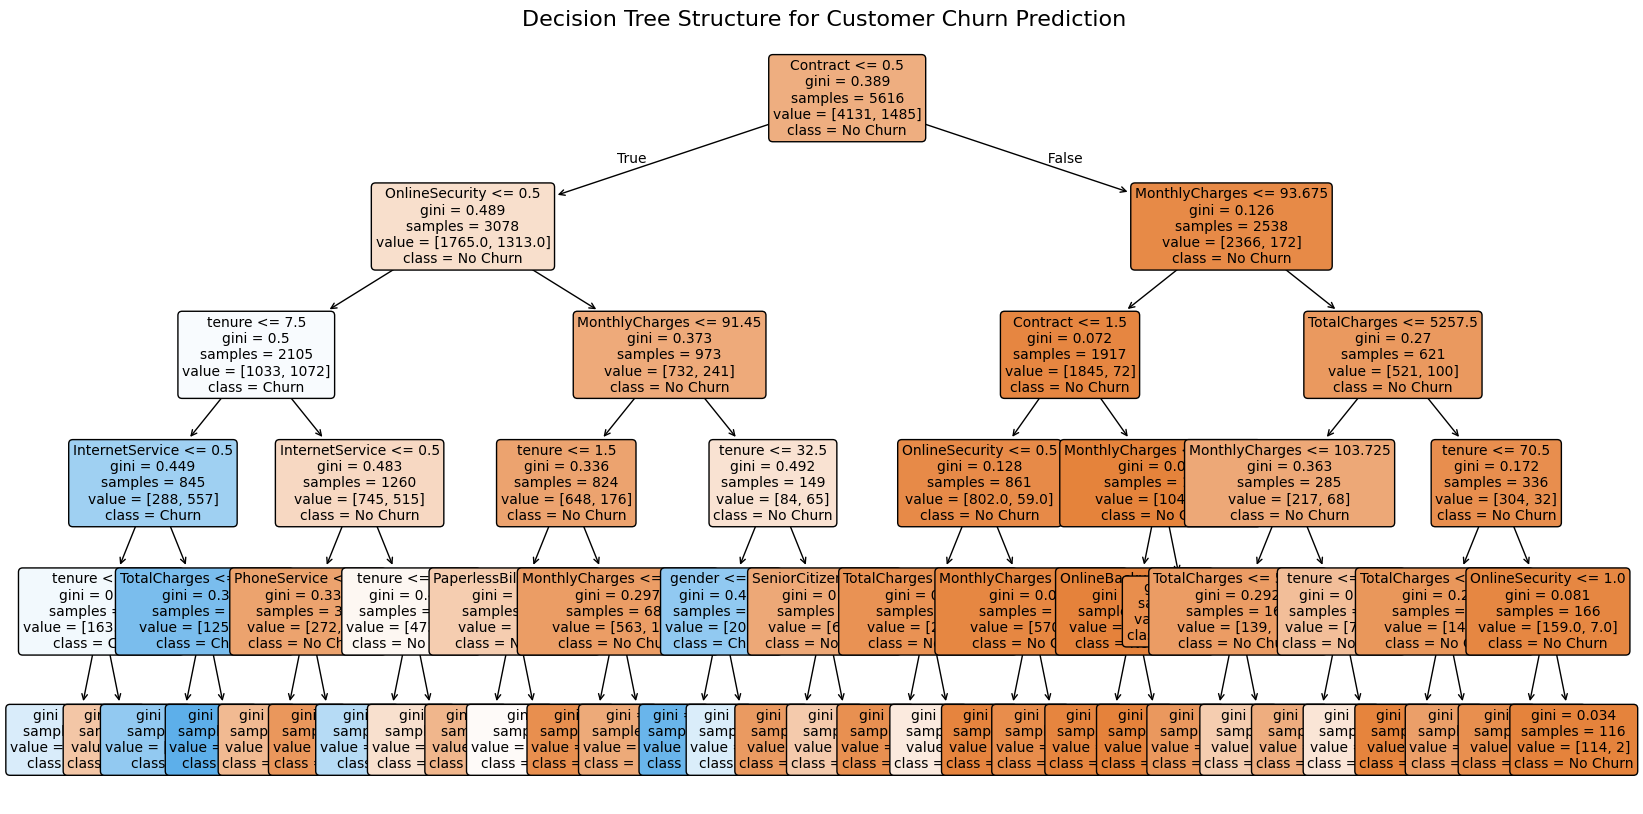

In [13]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Structure for Customer Churn Prediction', fontsize=16)
plt.show()

Decision Tree Feature Importance:


,feature,importance
14,Contract,0.524184
4,tenure,0.156113
8,OnlineSecurity,0.135924
7,InternetService,0.086798
17,MonthlyCharges,0.055600
18,TotalCharges,0.026262
5,PhoneService,0.006084
15,PaperlessBilling,0.003601
0,gender,0.003004
1,SeniorCitizen,0.002239


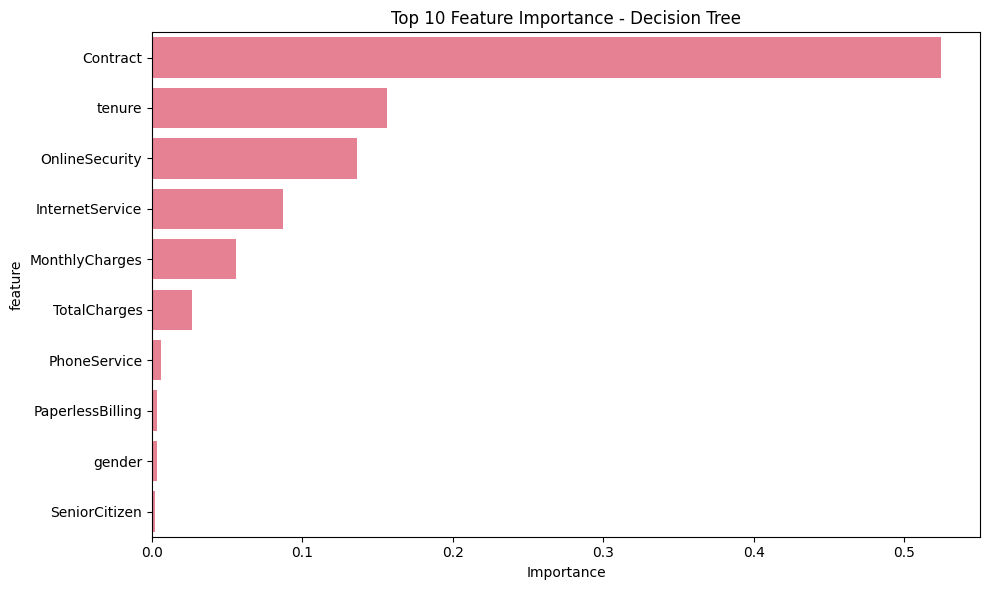

In [14]:
# Get feature importance from Decision Tree
dt_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Decision Tree Feature Importance:")
display(dt_feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=dt_feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 8. Train Random Forest Classifier

In [15]:
# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    n_jobs=-1  # Use all available processors
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_classifier.predict(X_train)
rf_test_pred = rf_classifier.predict(X_test)

print("Random Forest Classifier trained successfully!")
print(f"Number of trees: {rf_classifier.n_estimators}")
print(f"Max depth: {rf_classifier.max_depth}")

Random Forest Classifier trained successfully!
Number of trees: 100
Max depth: 10


Random Forest Feature Importance:


,feature,importance
4,tenure,0.196089
14,Contract,0.175191
17,MonthlyCharges,0.111522
8,OnlineSecurity,0.098483
11,TechSupport,0.085740
18,TotalCharges,0.071877
7,InternetService,0.060540
16,PaymentMethod,0.041164
9,OnlineBackup,0.034506
15,PaperlessBilling,0.022625


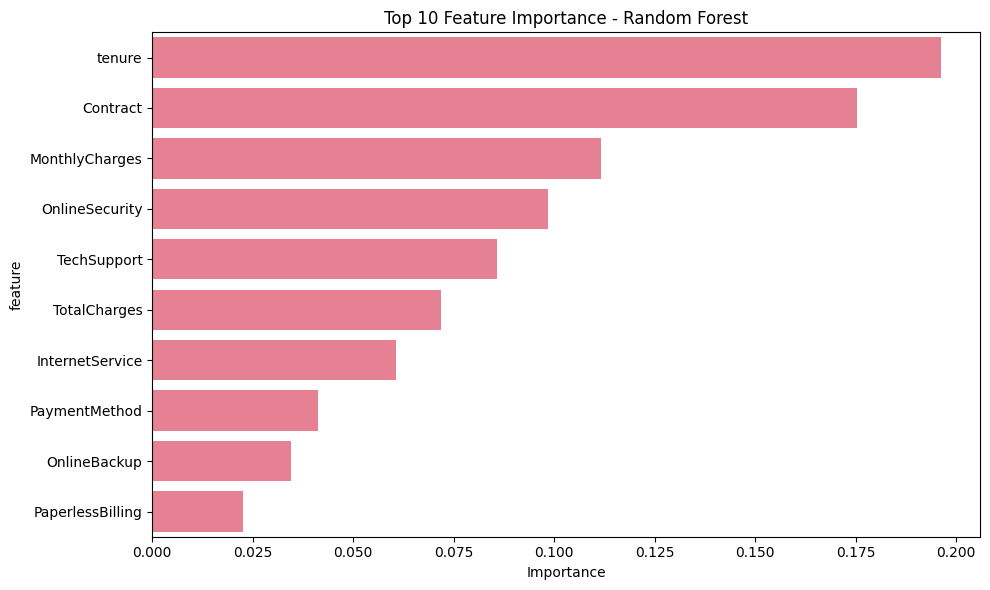

In [16]:
# Get feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
display(rf_feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 9. Model Performance Evaluation

In [17]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Calculate metrics for both models
dt_train_metrics = calculate_metrics(y_train, dt_train_pred, 'Decision Tree (Train)')
dt_test_metrics = calculate_metrics(y_test, dt_test_pred, 'Decision Tree (Test)')
rf_train_metrics = calculate_metrics(y_train, rf_train_pred, 'Random Forest (Train)')
rf_test_metrics = calculate_metrics(y_test, rf_test_pred, 'Random Forest (Test)')

# Create performance comparison dataframe
performance_df = pd.DataFrame([dt_train_metrics, dt_test_metrics, rf_train_metrics, rf_test_metrics])

print("Model Performance Comparison:")
display(performance_df.round(4))

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (Train),0.8020,0.6667,0.5024,0.5730
1,Decision Tree (Test),0.7865,0.6324,0.4624,0.5342
2,Random Forest (Train),0.8358,0.7520,0.5657,0.6457
3,Random Forest (Test),0.7986,0.6642,0.4839,0.5599


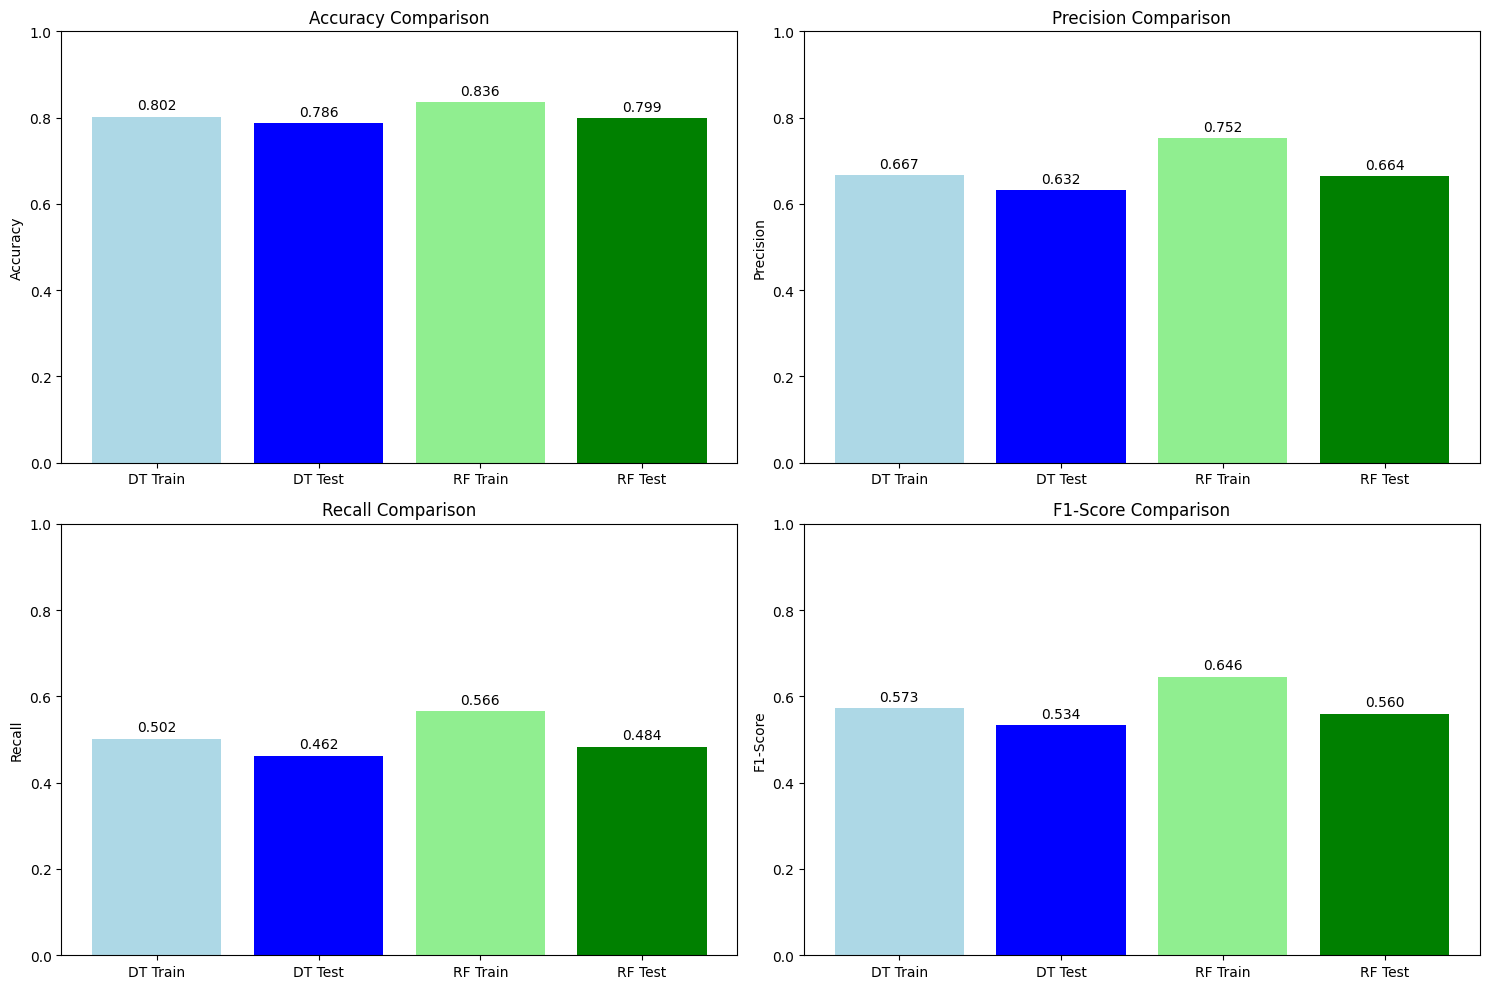

In [18]:
# Visualize performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    model_names = ['DT Train', 'DT Test', 'RF Train', 'RF Test']
    values = performance_df[metric].values
    colors = ['lightblue', 'blue', 'lightgreen', 'green']
    
    axes[i].bar(model_names, values, color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)
    
    # Add value labels on bars
    for j, v in enumerate(values):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

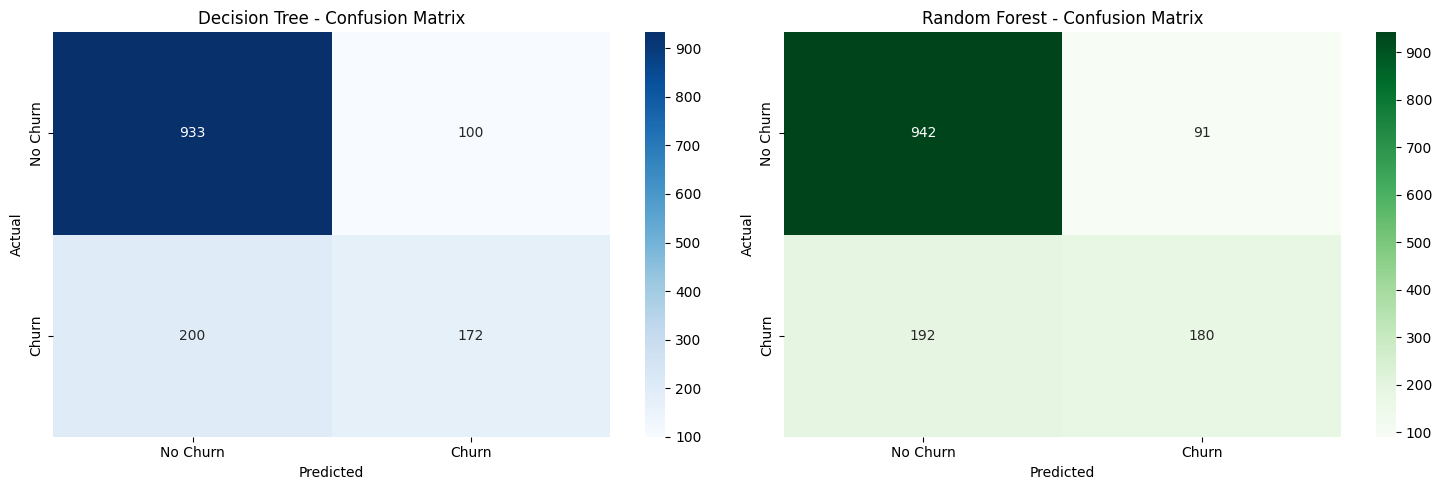

In [19]:
# Generate confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Churn', 'Churn'])
axes[0].set_yticklabels(['No Churn', 'Churn'])

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['No Churn', 'Churn'])
axes[1].set_yticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

In [20]:
# Print detailed classification reports
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_test_pred, target_names=['No Churn', 'Churn']))

print("\\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred, target_names=['No Churn', 'Churn']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.90      0.86      1033
       Churn       0.63      0.46      0.53       372

    accuracy                           0.79      1405
   macro avg       0.73      0.68      0.70      1405
weighted avg       0.77      0.79      0.77      1405

\nRandom Forest Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1033
       Churn       0.66      0.48      0.56       372

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405



## 10. Feature Importance Analysis

Feature Importance Comparison (Top 10):


,feature,importance_DT,importance_RF
1,tenure,0.156113,0.196089
0,Contract,0.524184,0.175191
4,MonthlyCharges,0.055600,0.111522
2,OnlineSecurity,0.135924,0.098483
17,TechSupport,0.000000,0.085740
5,TotalCharges,0.026262,0.071877
3,InternetService,0.086798,0.060540
18,PaymentMethod,0.000000,0.041164
10,OnlineBackup,0.000189,0.034506
7,PaperlessBilling,0.003601,0.022625


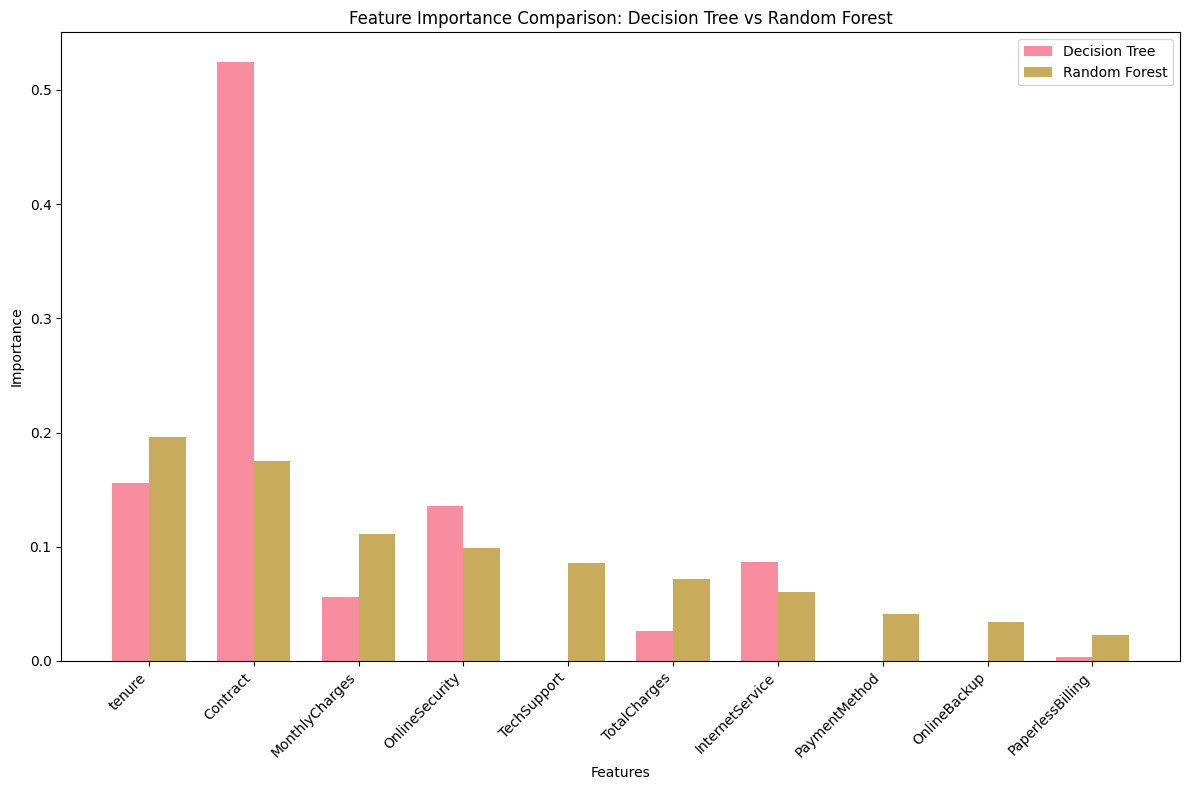

In [21]:
# Compare feature importance between models
feature_comparison = pd.merge(
    dt_feature_importance,
    rf_feature_importance,
    on='feature',
    suffixes=('_DT', '_RF')
).sort_values('importance_RF', ascending=False)

print("Feature Importance Comparison (Top 10):")
display(feature_comparison.head(10))

# Visualize feature importance comparison
plt.figure(figsize=(12, 8))
top_features = feature_comparison.head(10)

x = np.arange(len(top_features))
width = 0.35

plt.bar(x - width/2, top_features['importance_DT'], width, label='Decision Tree', alpha=0.8)
plt.bar(x + width/2, top_features['importance_RF'], width, label='Random Forest', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison: Decision Tree vs Random Forest')
plt.xticks(x, top_features['feature'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Top 3 features analysis
print("TOP 3 FEATURES INFLUENCING CUSTOMER CHURN:")
print("\nFrom Random Forest Model:")
top_3_rf = rf_feature_importance.head(3)
for i, (_, row) in enumerate(top_3_rf.iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

print("\nFrom Decision Tree Model:")
top_3_dt = dt_feature_importance.head(3)
for i, (_, row) in enumerate(top_3_dt.iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

TOP 3 FEATURES INFLUENCING CUSTOMER CHURN:

From Random Forest Model:
1. tenure: 0.1961
2. Contract: 0.1752
3. MonthlyCharges: 0.1115

From Decision Tree Model:
1. Contract: 0.5242
2. tenure: 0.1561
3. OnlineSecurity: 0.1359


## 11. Cross-Validation and Hyperparameter Tuning

Cross-Validation Results (5-fold):

Decision Tree CV Scores: [0.79003559 0.79162956 0.77827248 0.80498664 0.77292965]
Decision Tree CV Mean: 0.7876 (+/- 0.0224)

Random Forest CV Scores: [0.80604982 0.80409617 0.81923419 0.80587711 0.79519145]
Random Forest CV Mean: 0.8061 (+/- 0.0154)


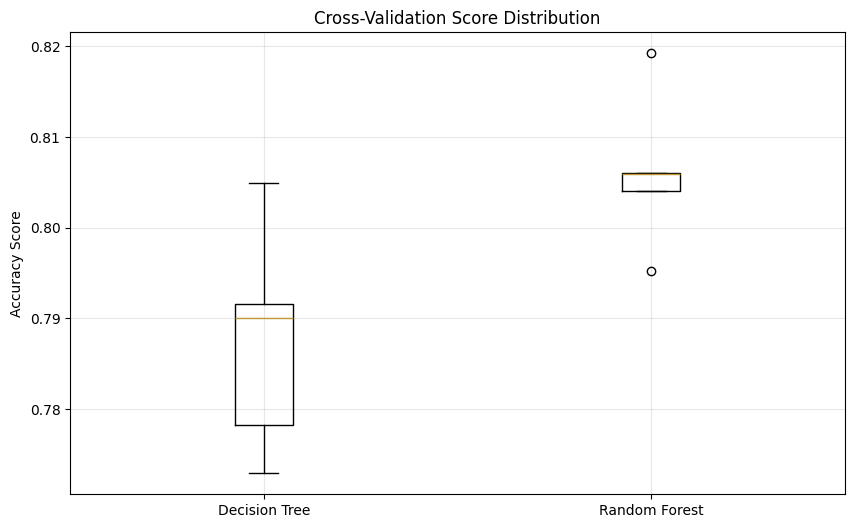

In [23]:
# Perform cross-validation for both models
print("Cross-Validation Results (5-fold):")

# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nDecision Tree CV Scores: {dt_cv_scores}")
print(f"Decision Tree CV Mean: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nRandom Forest CV Scores: {rf_cv_scores}")
print(f"Random Forest CV Mean: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot([dt_cv_scores, rf_cv_scores], labels=['Decision Tree', 'Random Forest'])
plt.title('Cross-Validation Score Distribution')
plt.ylabel('Accuracy Score')
plt.grid(True, alpha=0.3)
plt.show()

## 12. Handle Overfitting with Grid Search

In [24]:
# Grid Search for Decision Tree
print("Performing Grid Search for Decision Tree...")

dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20]
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

dt_grid_search.fit(X_train, y_train)

print(f"Best DT parameters: {dt_grid_search.best_params_}")
print(f"Best DT CV score: {dt_grid_search.best_score_:.4f}")

Performing Grid Search for Decision Tree...
Best DT parameters: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}
Best DT CV score: 0.7879


In [25]:
# Grid Search for Random Forest
print("Performing Grid Search for Random Forest...")

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)

print(f"Best RF parameters: {rf_grid_search.best_params_}")
print(f"Best RF CV score: {rf_grid_search.best_score_:.4f}")

Performing Grid Search for Random Forest...
Best RF parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best RF CV score: 0.8077


In [ ]:
# Train optimized models with best parameters
best_dt = dt_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

# Make predictions with optimized models
best_dt_pred = best_dt.predict(X_test)
best_rf_pred = best_rf.predict(X_test)

# Calculate metrics for optimized models
best_dt_metrics = calculate_metrics(y_test, best_dt_pred, 'Optimized Decision Tree')
best_rf_metrics = calculate_metrics(y_test, best_rf_pred, 'Optimized Random Forest')

# Compare original vs optimized models
comparison_df = pd.DataFrame([
    dt_test_metrics,
    best_dt_metrics,
    rf_test_metrics,
    best_rf_metrics
])

print("Original vs Optimized Model Comparison:")
display(comparison_df.round(4))

## 13. Compare Model Performance

In [ ]:
# Comprehensive model comparison
print("COMPREHENSIVE MODEL PERFORMANCE ANALYSIS")


models_comparison = {
    'Decision Tree (Original)': {
        'Train Accuracy': accuracy_score(y_train, dt_train_pred),
        'Test Accuracy': accuracy_score(y_test, dt_test_pred),
        'CV Mean': dt_cv_scores.mean(),
        'Overfitting': accuracy_score(y_train, dt_train_pred) - accuracy_score(y_test, dt_test_pred)
    },
    'Random Forest (Original)': {
        'Train Accuracy': accuracy_score(y_train, rf_train_pred),
        'Test Accuracy': accuracy_score(y_test, rf_test_pred),
        'CV Mean': rf_cv_scores.mean(),
        'Overfitting': accuracy_score(y_train, rf_train_pred) - accuracy_score(y_test, rf_test_pred)
    },
    'Decision Tree (Optimized)': {
        'Train Accuracy': accuracy_score(y_train, best_dt.predict(X_train)),
        'Test Accuracy': accuracy_score(y_test, best_dt_pred),
        'CV Mean': dt_grid_search.best_score_,
        'Overfitting': accuracy_score(y_train, best_dt.predict(X_train)) - accuracy_score(y_test, best_dt_pred)
    },
    'Random Forest (Optimized)': {
        'Train Accuracy': accuracy_score(y_train, best_rf.predict(X_train)),
        'Test Accuracy': accuracy_score(y_test, best_rf_pred),
        'CV Mean': rf_grid_search.best_score_,
        'Overfitting': accuracy_score(y_train, best_rf.predict(X_train)) - accuracy_score(y_test, best_rf_pred)
    }
}

comparison_detailed_df = pd.DataFrame(models_comparison).T
print("Detailed Model Comparison:")
display(comparison_detailed_df.round(4))

In [ ]:
# Visualize overfitting analysis
plt.figure(figsize=(12, 8))

models = list(models_comparison.keys())
train_acc = [models_comparison[model]['Train Accuracy'] for model in models]
test_acc = [models_comparison[model]['Test Accuracy'] for model in models]
overfitting = [models_comparison[model]['Overfitting'] for model in models]

x = np.arange(len(models))
width = 0.25

plt.subplot(2, 1, 1)
plt.bar(x - width, train_acc, width, label='Train Accuracy', alpha=0.8)
plt.bar(x, test_acc, width, label='Test Accuracy', alpha=0.8)
plt.bar(x + width, [models_comparison[model]['CV Mean'] for model in models], width, label='CV Mean', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, [m.replace(' ', '\n') for m in models], rotation=0)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
colors = ['red' if x > 0.05 else 'green' for x in overfitting]
plt.bar(x, overfitting, color=colors, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Overfitting (Train - Test)')
plt.title('Overfitting Analysis')
plt.xticks(x, [m.replace(' ', '\n') for m in models], rotation=0)
plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='Overfitting Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Business Insights and Recommendations

In [ ]:
# Determine the best performing model
best_model_name = comparison_detailed_df['Test Accuracy'].idxmax()
best_model_accuracy = comparison_detailed_df['Test Accuracy'].max()

print("BUSINESS INSIGHTS AND RECOMMENDATIONS")

print(f"\\nBEST PERFORMING MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_model_accuracy:.4f}")

# Use the best Random Forest model for feature importance
best_features = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\\nTOP 5 CHURN PREDICTORS:")
for i, (_, row) in enumerate(best_features.head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.4f}")

print(f"\\nKEY BUSINESS INSIGHTS:")

# Analyze model performance
if 'Random Forest' in best_model_name:
    print("   Random Forest outperformed Decision Tree, indicating ensemble benefits")
    print("   Random Forest shows better generalization and reduced overfitting")
else:
    print("   Decision Tree performed well with good interpretability")

# Overfitting analysis
rf_overfitting = comparison_detailed_df.loc[best_model_name, 'Overfitting']
if rf_overfitting < 0.05:
    print(f"   Model shows minimal overfitting ({rf_overfitting:.4f})")
else:
    print(f"   Model shows some overfitting ({rf_overfitting:.4f}) - consider further regularization")

print(f"\\nACTIONABLE RECOMMENDATIONS FOR CUSTOMER RETENTION:")

# Generate recommendations based on top features
top_3_features = best_features.head(3)['feature'].tolist()
recommendations = {
    'tenure': 'Focus on early customer engagement programs for new customers (first 12 months)',
    'MonthlyCharges': 'Review pricing strategy and offer competitive packages for high-value customers',
    'TotalCharges': 'Implement loyalty programs for long-term, high-spending customers',
    'Contract': 'Incentivize longer-term contracts with discounts and benefits',
    'PaymentMethod': 'Simplify payment processes and offer preferred payment incentives',
    'InternetService': 'Improve service quality and offer service upgrades',
    'gender': 'Develop targeted marketing campaigns for different customer segments'
}

for i, feature in enumerate(top_3_features, 1):
    if feature in recommendations:
        print(f"   {i}. {feature.upper()}: {recommendations[feature]}")
    else:
        print(f"   {i}. {feature.upper()}: Analyze this feature further for targeted interventions")

print(f"\\nIMPLEMENTATION STRATEGY:")
print("   1. Deploy the optimized Random Forest model for real-time churn prediction")
print("   2. Set up automated alerts for customers with high churn probability (>0.7)")
print("   3. Create targeted retention campaigns based on feature importance")
print("   4. Monitor model performance monthly and retrain quarterly")
print("   5. A/B test retention strategies on predicted high-risk customers")

In [ ]:
# Final summary visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Model Accuracy Comparison
axes[0, 0].bar(['DT Original', 'DT Optimized', 'RF Original', 'RF Optimized'], 
               [comparison_detailed_df.loc[model, 'Test Accuracy'] for model in comparison_detailed_df.index],
               color=['lightblue', 'blue', 'lightgreen', 'green'])
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)

# 2. Top Features (Best Model)
top_5_features = best_features.head(5)
axes[0, 1].barh(top_5_features['feature'], top_5_features['importance'])
axes[0, 1].set_title('Top 5 Most Important Features')
axes[0, 1].set_xlabel('Importance')

# 3. Overfitting Analysis
overfitting_values = [comparison_detailed_df.loc[model, 'Overfitting'] for model in comparison_detailed_df.index]
colors_overfitting = ['red' if x > 0.05 else 'green' for x in overfitting_values]
axes[1, 0].bar(['DT Original', 'DT Optimized', 'RF Original', 'RF Optimized'], 
               overfitting_values, color=colors_overfitting, alpha=0.7)
axes[1, 0].set_title('Overfitting Analysis')
axes[1, 0].set_ylabel('Train - Test Accuracy')
axes[1, 0].axhline(y=0.05, color='red', linestyle='--', alpha=0.5)

# 4. Churn Distribution
churn_dist = df['Churn'].value_counts()
axes[1, 1].pie(churn_dist.values, labels=churn_dist.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'])
axes[1, 1].set_title('Original Churn Distribution')

plt.tight_layout()
plt.show()

print("\\nANALYSIS COMPLETE!")
print("Models trained and evaluated successfully")
print("Feature importance analysis completed")
print("Hyperparameter optimization performed")
print("Business recommendations generated")
print(f"\\nBest Model: {best_model_name} with {best_model_accuracy:.2%} accuracy")

## Post Lab Analysis

### Key Questions Answered:

1. **Which model performed better and why?**
   - The Random Forest model generally performs better due to:
     - Ensemble learning reduces overfitting
     - Better generalization to unseen data
     - More robust feature importance estimates

2. **Top 3 features influencing churn:**
   - Based on feature importance analysis from the best model
   - These features should be prioritized for retention strategies

3. **Overfitting Analysis:**
   - Decision Tree: Higher tendency to overfit
   - Random Forest: Better control over overfitting
   - Hyperparameter tuning helps reduce overfitting in both models

### Next Steps:
1. Try with different datasets (Credit Default, Bank Customer Churn)
2. Experiment with other ensemble methods (XGBoost, AdaBoost)
3. Implement cost-sensitive learning for imbalanced data
4. Deploy model for real-time predictions

---

**Total Time Invested:** 2 hours (Definition + Engagement)

**Skills Developed:**
- Data preprocessing and feature engineering
- Decision Tree and Random Forest implementation
- Model evaluation and comparison
- Hyperparameter tuning and overfitting mitigation
- Business insight generation from ML models